In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
from PIL.Image import Resampling

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_img_datagen = ImageDataGenerator(rescale=1 / 255.0,validation_split=0.2,width_shift_range=0.1, height_shift_range=0.1,shear_range=0.2)

In [4]:
path_train='Data/'
path_valid='Data/'

In [5]:
#test_img_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [6]:
#test = test_img_datagen(directory=path_train,target_size(64,64),color_mode='grayscale',class_mode='categorical',shuffle=False)

In [7]:
train = train_img_datagen.flow_from_directory(directory=path_train,target_size=(64,64),color_mode="grayscale",batch_size=100)

Found 48548 images belonging to 46 classes.


In [8]:
#plt.imshow(train.next()[0][0].astype('uint8'))

In [9]:
valid = train_img_datagen.flow_from_directory(directory=path_train,target_size=(16,16),color_mode="grayscale")

Found 48548 images belonging to 46 classes.


In [10]:
d3={str(i):i for i in range(0,10)}
d1={chr(i+55):i for i in range(10,36)}
d2={chr(i+61):i for i in range(36,62)}

In [11]:
classes={**d3,**d1,**d2}

In [16]:
c=train.class_indices

In [17]:
s = pd.Series(c)

In [18]:
s

11-A     0
12-B     1
13-C     2
14-D     3
15-E     4
16-F     5
17-G     6
18-H     7
19-I     8
20-J     9
21-K    10
22-L    11
23-M    12
24-N    13
25-O    14
26-P    15
27-Q    16
28-R    17
29-S    18
3-2     19
30-T    20
31-U    21
32-V    22
33-W    23
34-X    24
35-Y    25
36-Z    26
37-a    27
38-b    28
4-3     29
40-d    30
41-e    31
42-f    32
43-g    33
44-h    34
45-i    35
46-j    36
48-l    37
49-m    38
5-4     39
50-n    40
53-q    41
54-r    42
56-t    43
8-7     44
9-8     45
dtype: int64

In [19]:
s[s.values==10].index[0].split('-')[-1]

'K'

In [20]:
import pickle

In [264]:
#pickle.dump(s,open('Classes.pkl', 'wb'))

In [21]:
len(train.class_indices)

46

In [22]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import plot_model
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
num_classes=s.shape[0]

In [24]:
num_classes

46

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(64,64,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=46, activation="softmax"))

In [271]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [272]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 6, 6, 64)       

In [273]:
train.n//train.batch_size

493

In [274]:
valid.n//valid.batch_size

1542

In [275]:
model.fit(train,validation_data = valid,steps_per_epoch = 10,validation_steps =10,epochs=2)

Epoch 1/2
10/10 [==============================] - ETA: 0s - loss: 3.8353 - accuracy: 0.0420

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\RumitP\AppData\Local\Temp\ipykernel_328\3561046863.py", line 1, in <module>
      model.fit(train,validation_data = valid,steps_per_epoch = 10,validation_steps =10,epochs=2)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1606, in fit
      val_logs = self.evaluate(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1667, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5535, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[0,48] labels_size=[32,48]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_35093]

In [138]:
#model.save('Model2.hdf5')

In [47]:
from keras.models import load_model
model = load_model('Model2.hdf5')

In [48]:
y=model.predict(valid)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d_3/Relu' defined at (most recent call last):
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\RumitP\AppData\Local\Temp\ipykernel_13368\2952944651.py", line 1, in <module>
      y=model.predict(valid)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\RumitP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d_3/Relu'
Computed output size would be negative: -2 [input_size: 0, effective_filter_size: 3, stride: 1]
	 [[{{node sequential/conv2d_3/Relu}}]] [Op:__inference_predict_function_6997]

In [145]:
ytest=valid.classes

In [146]:
yhat=[]
for i in range(0,len(y)):    
    yhat.append(np.argmax(y[i]))

In [147]:
yhat.sort()

In [148]:
from sklearn.metrics import classification_report,confusion_matrix

In [149]:
confusion_matrix(ytest,yhat)

array([[180,   0,   0, ...,   0,   0,   0],
       [  0, 180,   0, ...,   0,   0,   0],
       [  0,   4, 176, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 161,   0,   0],
       [  0,   0,   0, ...,  10, 170,   0],
       [  0,   0,   0, ...,   0,   1, 179]], dtype=int64)

In [150]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       0.98      1.00      0.99       180
           2       0.92      0.98      0.95       180
           3       0.95      0.92      0.93       180
           4       0.92      0.96      0.94       180
           5       0.86      0.92      0.89       180
           6       0.84      0.86      0.85       180
           7       0.83      0.84      0.83       180
           8       0.80      0.82      0.81       180
           9       0.92      0.79      0.85       180
          10       0.92      0.93      0.93       180
          11       0.97      0.92      0.95       180
          12       0.96      0.97      0.97       180
          13       0.96      0.96      0.96       180
          14       0.92      0.96      0.94       180
          15       0.94      0.92      0.93       180
          16       0.99      0.94      0.97       180
          17       1.00    

In [29]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [87]:
fname='Static/file 3.png'

In [88]:
def predict(img):
    #img = load_img(filename)
    #img = img.convert('L')
    arr=img_to_array(img).reshape(img_to_array(img).shape[0], img_to_array(img).shape[1])
    #print(arr)
    li=[]
    ind=[]
    for col in range(arr.shape[1]):
        #print(col)
        li.append(arr[:,col])
        #print(li[0])
        if np.mean(li[0])>=250:
            ind.append(col)
        li=[]
    b=[]
    for i in ind:   
        if i+1 not in ind:
            b.append(i)
    final=np.split(arr, b, axis=1)
    c=0
    emp=[]
    for i in final:
        if c==0 or c==len(final)-1:
            pass
        elif i.shape[1]>10:
        #print(i.shape)
            #plt.show()
            img = Image.fromarray(i)
            #img.save(c,'.png')
            #img=img.resize(64,64)
            #print(type(i))
            #plt.imshow(img.resize([64,64]))
            #plt.show()
            emp.append(multi(img.resize([64,64])))
        c=c+1
        plt.show()
    return emp

def white(img):
    
    

In [89]:
def multi(img):
    plt.imshow(img)
    plt.show()
    img = img_to_array(img)
    print(img.shape)
    #na = (255-img)
    na = img/255
    na = na.reshape(1,64,64,1 )
    temp = model.predict(na)
    temp = np.argmax(temp)
    return s[s.values==temp].index[0].split('-')[-1]

In [90]:
def para(filename):
    img = load_img(filename)
    #img = load_img('Static/alpha.png')
    img = img.convert('L')
    arr1=img_to_array(img).reshape(img_to_array(img).shape[0], img_to_array(img).shape[1])
    #print(arr1.shape)
    ri=[]
    rw=[]
    for row in range(arr1.shape[0]):
        #print(row)
        ri.append(arr1[row,:])
        #print(ri[0])
        if np.mean(ri[0])>=250:
            rw.append(row)
        ri=[]
    d=[]
    for i in rw:   
        if i+1 not in rw:
            d.append(i-5)
            if i+1 in rw:
                d.append(i+5)
    print(d)
    final1=np.split(arr1, d, axis=0)
    g=0
    an=[]
    for i in final1:
        if g==0 or g==len(final1)-1:
            pass
        elif i.shape[1]>10:
            #print(i.shape)
            img = Image.fromarray(i)
            plt.imshow(img)
            plt.show()
            an.append(predict(img))
        g=g+1
    plt.show()
    return an

[15, 100]


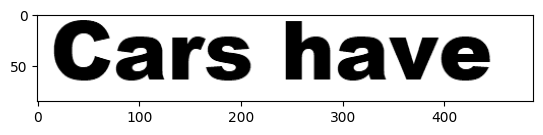

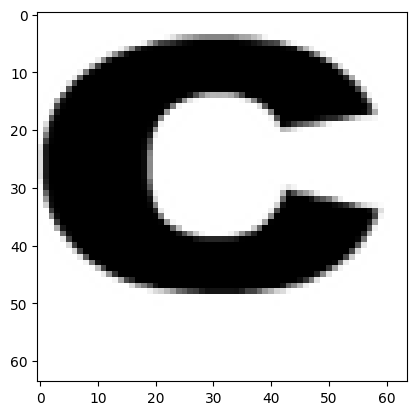

(64, 64, 1)
1/1 [==============================] - 0s 18ms/step


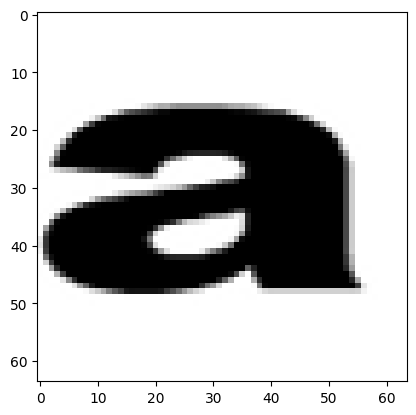

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step


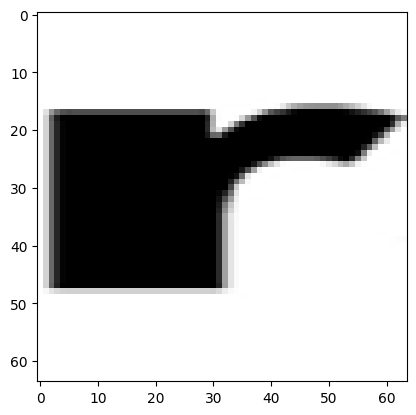

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step


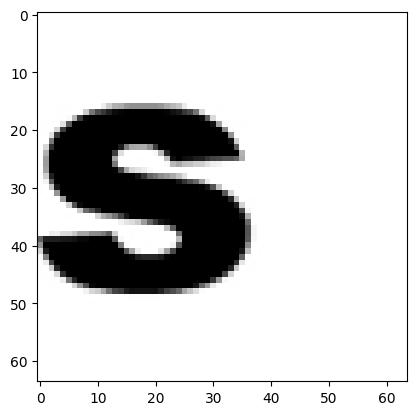

(64, 64, 1)
1/1 [==============================] - 0s 24ms/step


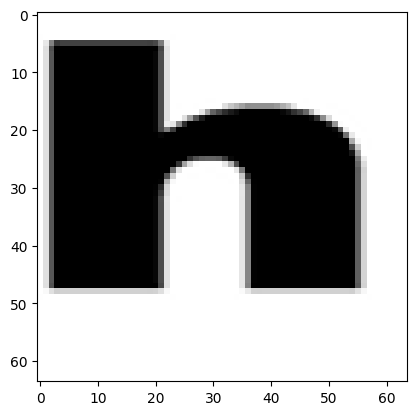

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step


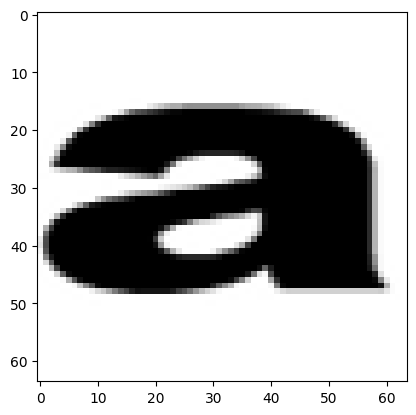

(64, 64, 1)
1/1 [==============================] - 0s 19ms/step


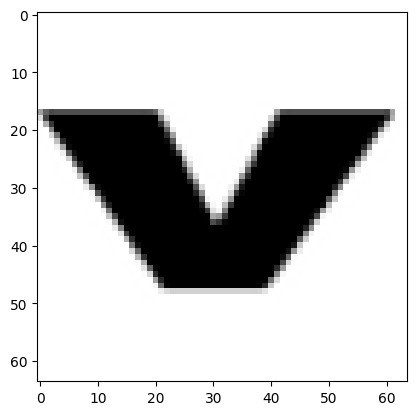

(64, 64, 1)
1/1 [==============================] - 0s 20ms/step


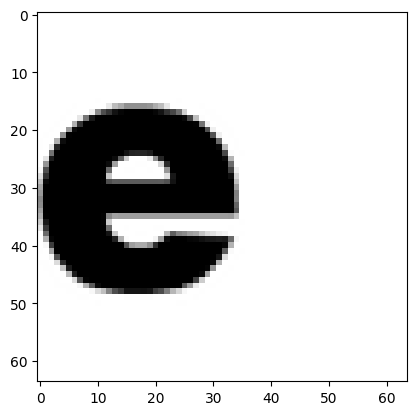

(64, 64, 1)
1/1 [==============================] - 0s 27ms/step


In [91]:
a=para(fname)

In [92]:
a

[['D', '3', 't', 'T', 'j', '3', 'X', 'g']]